In [6]:
import time

import cv2
import numpy as np
import matplotlib.pyplot as plt
from   matplotlib.colors import LogNorm
from   scipy.fftpack     import fft2,ifft2,fftshift,ifftshift
from   scipy.ndimage     import gaussian_filter
from   scipy.signal      import fftconvolve

In [2]:
def surface_plot (matrix, **kwargs):
    # acquire the cartesian coordinate matrices from the matrix
    # x is cols, y is rows
    (x, y) = np.meshgrid(np.arange(matrix.shape[1]), np.arange(matrix.shape[0]))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x, y, matrix, **kwargs)
    return (fig, ax, surf)

def plot_spectrum(X_ft,centered=True):
    # A logarithmic colormap
    if centered:
      X_ftc = fftshift(X_ft)
    else:
      X_ftc = X_ft
    plt.imshow(np.abs(X_ftc), norm=LogNorm(vmin=5))
    plt.colorbar()

(630, 630)


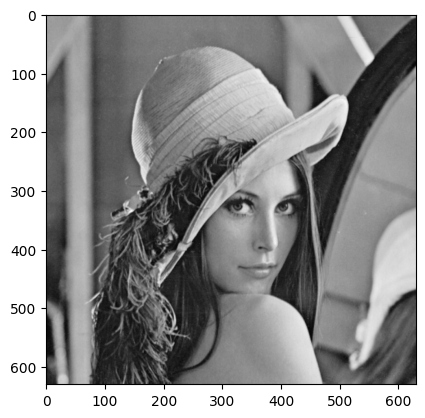

In [4]:
X = cv2.imread('Lenna.jpg', 0)/255.0
print(X.shape)
plt.figure()
plt.imshow(X,cmap='gray')
plt.show()

(30, 30)


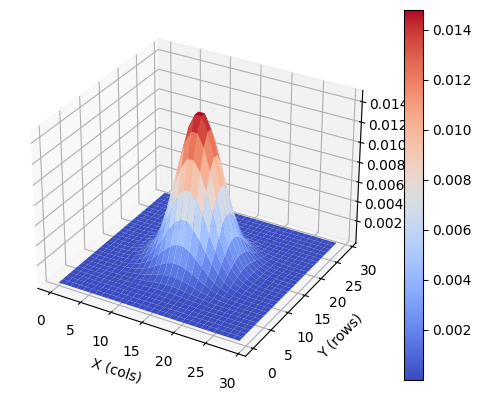

In [5]:
# First a 1-D  Gaussian
t = np.linspace(-10, 10, 30)
bump = np.exp(-0.1*t**2)
bump /= np.trapz(bump) # normalize the integral to 1

# make a 2-D kernel out of it
h = bump[:, np.newaxis] * bump[np.newaxis, :]

(fig, ax, surf) = surface_plot(h, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

print(h.shape)
ax.set_xlabel('X (cols)')
ax.set_ylabel('Y (rows)')
ax.set_zlabel('Z (values)')
plt.show()

P: 659 Q: 659
0.45113706588745117


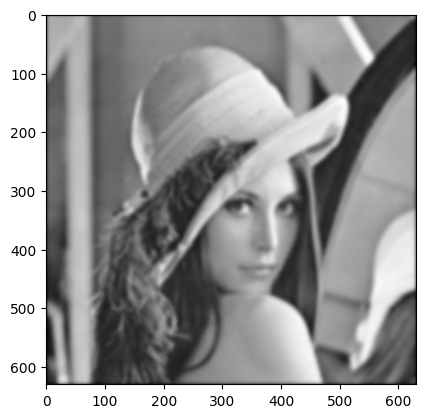

In [15]:
t0 = time.time()
A = X.shape[0]
B = X.shape[1]
C = h.shape[0]
D = h.shape[1]
P = A+C-1
Q = B+D-1
# P = A
# Q = B

print('P:',P,'Q:',Q)

h_ft = fft2(h, shape=(P,Q), axes=(0, 1))

# convolve
X_ft  = fft2(X, shape=(P,Q), axes=(0, 1))
X2_ft = h_ft * X_ft
Yo    = ifft2(X2_ft, axes=(0, 1)).real

# clip values to range
a = int(C/2)-1
b = int(D/2)-1
Y = np.clip(Yo[a:a+A,b:b+B], 0, 1)
t1= time.time()
print(t1-t0)

# plot output
plt.figure()
plt.imshow(Y,cmap='gray')
# plt.imshow(np.log(1+np.abs(h_ft)), "gray")

plt.show()

0.062297821044921875
(630, 630)


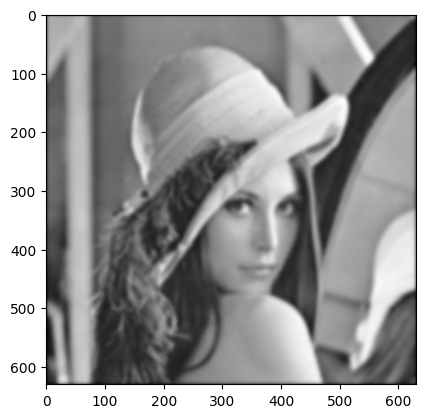

In [13]:
# Se obtiene el mismo resultado con fftconvolve
# Observar que X y h están en el dominio del espacio
# La función realiza los zero-paddings, las transformadas de Fourier, la multiplicación de los espectros
# y la transformada inversa
t0= time.time()
Y = fftconvolve(X,h, mode='same')
t1= time.time()
print(t1-t0)
plt.figure()
plt.imshow(Y,cmap='gray')
print(Y.shape)
plt.show()